### 🏠주택 가격 회귀 예측

#### Features

- id: 주택의 고유 id
- date: 등록 날짜
- bedrooms: 침실 개수
- bathrooms: 욕실 개수
- sqft_living: 주거 공간(단위: 제곱 피트)
- sqft_lot: 전체 부지 크기(단위: 제곱 피트)
- floors: 층수
- waterfront: 수변 위치 여부
- view: 전망 품질 수준(0~4)
- condition: 전반적인 상태(0~5)
- grade: 전반적인 등급 평가(1~13)
- sqft_above: 지상 주거 공간의 면적(단위: 제곱 피트)
- sqft_basement: 지하 공간 면적(단위: 제곱 피트)
- yr_built: 건설연도
- yr_renovated: 리모델링 연도, 해당 없을 시 0
- zipcode: 우편번호
- lat: 위도
- long: 경도
- sqft_living15: 주변 15개 주택의 주거 공간 면적(단위: 제곱 피트)
- sqft_lot15: 주변 15개 주택의 전체 부지 면적(단위: 제곱 피트)

#### Target

- price: 주택 가격

#### 🎈Cycle 1

#### 1-1. 데이터 탐색 및 시각화

- 데이터를 읽어옵니다.

In [46]:
import pandas as pd

h_df = pd.read_csv('./datasets/Housing.csv', low_memory=False)
h_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- info()를 통해 데이터를 확인해봅니다.

In [47]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- 중복행을 확인합니다.

In [48]:
h_df.duplicated().sum()

0

- 결측치를 확인합니다.

In [49]:
h_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- 히스토그램으로 분포를 시각화해봅니다.

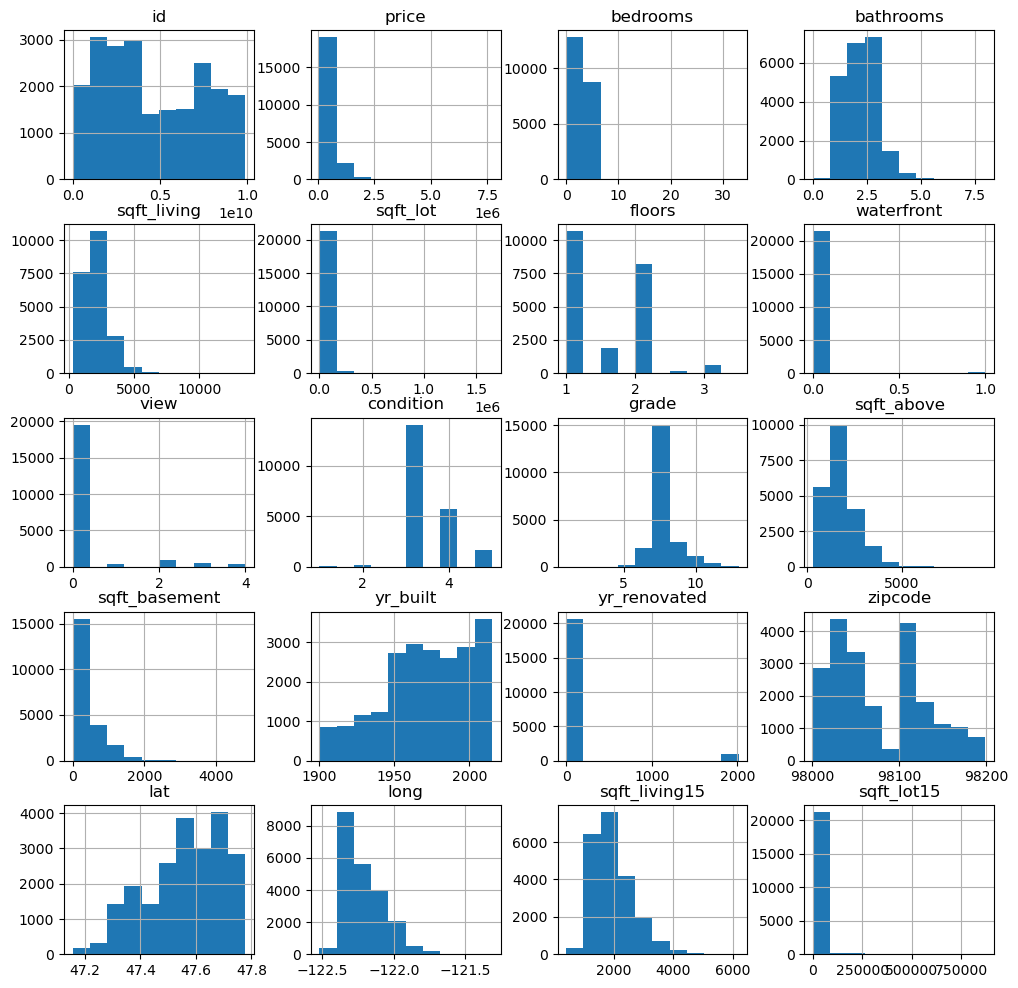

In [50]:
import matplotlib.pyplot as plt

h_df.hist(figsize=(12, 12))
plt.show()

#### 1-2. 데이터 전처리

- 회귀 학습에 불필요한 feature 및 비중 차이가 너무 큰 범주형 feature를 제외한 feature와 target으로 데이터프레임을 추출합니다.

In [51]:
pre_h_df = h_df.drop(labels=['id', 'zipcode', 'lat', 'long', 'date'], axis=1)
pre_h_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


#### 1-3. 회귀 모델 훈련, 예측 및 평가
- 먼저 회귀 예측을 수행합니다.

In [52]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df.iloc[:, 1:], pre_h_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [54]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 43215438004.9424, RMSE: 207883.2317, R2: 0.6574


- R2가 약 0.66으로, Polynomial feature로 변환하여 다항 회귀를 진행해봅니다.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [56]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 37006544498.0776, RMSE: 192370.8515, R2: 0.7066


- degree=2일 때 R2가 약 0.71, degree=3일 때 R2는 음수가 되므로 degree=2일 때 가장 높음을 알 수 있습니다.

#### 📌Cycle 2

#### 2-1. 데이터 전처리
- 종속 변수의 분포를 확인합니다.

<Axes: >

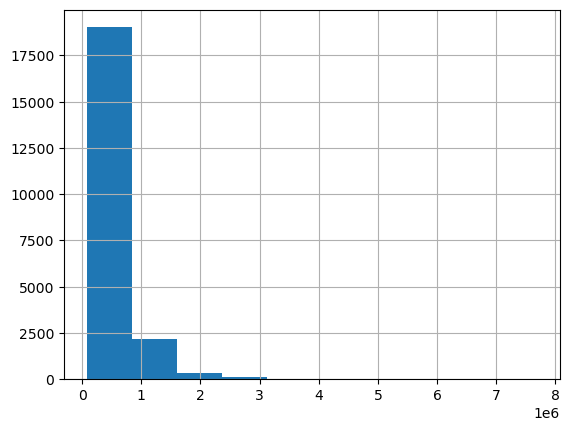

In [57]:
pre_h_df.price.hist()

<Axes: >

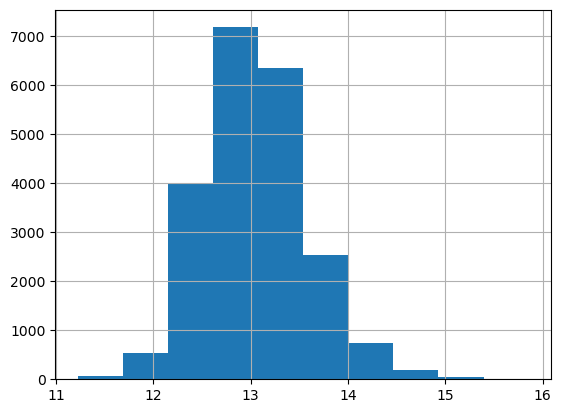

In [58]:
import numpy as np

np.log1p(pre_h_df.price).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

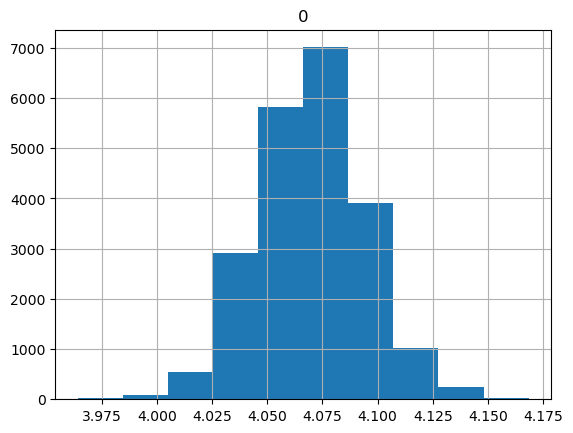

In [59]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_h_df[['price']])
pd.DataFrame(result).hist()

- PowerTransformer로 종속변수(price)를 변환하여 회귀 예측을 수행해보기로 합니다.

In [60]:
pre_h_df2 = pre_h_df.copy()
pre_h_df2.price = result
pre_h_df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,4.035631,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,4.078176,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,4.021287,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4.083380,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,4.075724,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,4.058973,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,4.064185,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,4.064441,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,4.064185,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


#### 2-2. 회귀 모델 훈련, 예측 및 평가

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, 1:], pre_h_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [62]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0149, R2: 0.6264


In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [64]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0141, R2: 0.6630


- 종속변수를 PowerTransformer을 통해 변환하지 않았을 때보다 R2 점수가 내려간 모습을 볼 수 있습니다.
- 따라서 이번에는 log1p 스케일링만 진행해봅니다.

In [65]:
import numpy as np

pre_h_df2 = pre_h_df.copy()
pre_h_df2.price = np.log1p(pre_h_df2.price)
pre_h_df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,12.351475,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,13.195616,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,12.100718,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,13.311331,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,13.142168,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793862,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,12.899222,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,12.904461,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,12.899222,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, 1:], pre_h_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [67]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0932, RMSE: 0.3052, R2: 0.6566


In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [69]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0858, RMSE: 0.2930, R2: 0.6836


- 여전히 R2가 원본 종속변수 값으로 예측을 수행했을 때(0.7066)보다 감소한 모습을 볼 수 있습니다.
- 따라서, test_size를 증가시켜 한 번 더 확인해보겠습니다.

In [70]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_h_df[['price']])
pre_h_df2 = pre_h_df.copy()
pre_h_df2.price = result

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, 1:], pre_h_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [72]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0149, R2: 0.6290


In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [74]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0142, R2: 0.6632


In [75]:
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.4, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [76]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0148, R2: 0.6303


In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.4, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [78]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0142, R2: 0.6631


In [79]:
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [80]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0149, R2: 0.6276


In [81]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [82]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0002, RMSE: 0.0143, R2: 0.6594


- **test_size를 0.5까지 증가시켜보며 확인해보았음에도, 여전히 PowerTransformer을 통해 스케일링했을 때보다 원본 종속변수로 회귀 예측을 수행했을 때 R2 점수가 더 높게 나왔습니다.**
- 이번에는 log1p 스케일링을 진행하여 test_size를 증가시켜보며 확인해보겠습니다.

In [83]:
import numpy as np

pre_h_df2 = pre_h_df.copy()
pre_h_df2.price = np.log1p(pre_h_df2.price)
pre_h_df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,12.351475,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,13.195616,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,12.100718,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,13.311331,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,13.142168,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793862,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,12.899222,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,12.904461,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,12.899222,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, 1:], pre_h_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0942, RMSE: 0.3069, R2: 0.6614


In [85]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0871, RMSE: 0.2951, R2: 0.6868


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, 1:], pre_h_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.4, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0931, RMSE: 0.3051, R2: 0.6625


In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.4, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0863, RMSE: 0.2938, R2: 0.6869


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, 1:], pre_h_df2.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0940, RMSE: 0.3066, R2: 0.6608


In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.5, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0879, RMSE: 0.2964, R2: 0.6830


- **마찬가지로 log1p 스케일링을 진행했을 때에도, 원본 종속변수로 회귀 예측을 했을 때보다 R2가 낮았습니다.**
- 따라서 종속변수에는 별다른 스케일링을 진행하지 않기로 합니다.

#### 2-3. 트리 기반 회귀 모델 훈련, 예측 및 평가

- DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor 모델로 회귀 예측을 수행합니다.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df.iloc[:, 1:], pre_h_df.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 65807941086.1036, RMSE: 256530.5851, R2: 0.4783
RandomForestRegressor
MSE: 31738511853.0951, RMSE: 178153.0574, R2: 0.7484
GradientBoostingRegressor
MSE: 32092539801.8972, RMSE: 179143.9081, R2: 0.7456
XGBRegressor
MSE: 34025172386.0437, RMSE: 184459.1347, R2: 0.7303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1751
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 15
[LightGBM] [Info] Start training from score 541073.705957
LGBMRegressor
MSE: 32849688123.1002, RMSE: 181244.8292, R2: 0.7396


In [102]:
rf_r.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 124,
 'verbose': 0,
 'warm_start': False}

In [106]:
rf_r.feature_importances_

array([0.00830324, 0.02118357, 0.24903867, 0.03653217, 0.00561617,
       0.0273408 , 0.01850344, 0.007816  , 0.37691453, 0.02844239,
       0.01343845, 0.09897312, 0.00463115, 0.06407074, 0.03919557])

#### 🎈RandomForestRegressor 모델로 회귀 예측을 수행했을 때 R2가 0.7484로 가장 높게 나타났습니다.

- GridSearchCV를 통해 최적의 하이퍼파라미터 조합을 찾아보고, R2를 더 상승시킬 수 있는지 확인해봅니다.

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = pre_h_df.iloc[:, 1:], pre_h_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

rfr = RandomForestRegressor(random_state=124)

parameters = {
    'max_depth': [4, 8, 12, 20],
    'min_samples_split': [20, 30, 40, 50],
    'n_estimators': [50, 100, 500, 1000]
}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

grid_rfr = GridSearchCV(rfr, param_grid=parameters, scoring='r2', cv=kfold, n_jobs=-1)
grid_rfr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 20],
                         'min_samples_split': [20, 30, 40, 50],
                         'n_estimators': [50, 100, 500, 1000]},
             scoring='r2')

In [94]:
result_df = pd.DataFrame(grid_rfr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.651501,60
1,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.652148,56
2,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.653103,49
3,"{'max_depth': 4, 'min_samples_split': 20, 'n_e...",0.652443,54
4,"{'max_depth': 4, 'min_samples_split': 30, 'n_e...",0.651125,62
...,...,...,...
59,"{'max_depth': 20, 'min_samples_split': 40, 'n_...",0.742784,16
60,"{'max_depth': 20, 'min_samples_split': 50, 'n_...",0.737906,28
61,"{'max_depth': 20, 'min_samples_split': 50, 'n_...",0.739138,26
62,"{'max_depth': 20, 'min_samples_split': 50, 'n_...",0.739891,23


In [95]:
rfr = grid_rfr.best_estimator_
rfr

RandomForestRegressor(max_depth=20, min_samples_split=20, n_estimators=500,
                      random_state=124)

In [97]:
prediction = rfr.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 32685343135.3619, RMSE: 180790.8823, R2: 0.7409


#### 🎈Cycle 3

#### 3-1. 데이터 전처리

- 이번에는 id와 date feature만을 제거한 후 회귀 예측을 수행하여 R2 점수의 상승이 있는지 확인해 보겠습니다.

In [107]:
pre_h_df3 = h_df.drop(labels=['id', 'date'], axis=1)
pre_h_df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### 3-2. 회귀 모델 훈련, 예측 및 평가

In [108]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df3.iloc[:, 1:], pre_h_df3.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [110]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 36867850022.3851, RMSE: 192010.0258, R2: 0.7077


- Cycle 1의 결과보다 R2가 상승했음을 알 수 있습니다.
- 이어서 PolynomialFeatures를 통해 feature를 변환한 후 다항 회귀 예측을 진행합니다.

In [125]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [126]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 23451084273.5054, RMSE: 153137.4685, R2: 0.8141


- 다항 회귀 예측 결과, R2가 약 0.8141로 가장 높았습니다.

- 이어서 트리 기반 모델로 회귀 예측을 수행해봅니다.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df3.iloc[:, 1:], pre_h_df3.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 33886768469.7884, RMSE: 184083.5910, R2: 0.7314
RandomForestRegressor
MSE: 16970725664.9771, RMSE: 130271.7378, R2: 0.8655
GradientBoostingRegressor
MSE: 17332364336.6215, RMSE: 131652.4376, R2: 0.8626
XGBRegressor
MSE: 18405210267.1238, RMSE: 135665.8036, R2: 0.8541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2332
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 541073.705957
LGBMRegressor
MSE: 16977585248.2190, RMSE: 130298.0631, R2: 0.8654


- RandomForest와 LightGBM 모델의 R2가 각각 약 0.8655, 0.8654로 가장 높았습니다.
- 이번에는 종속변수에 PowerTransform과 log1p 스케일을 적용하여 회귀 예측을 진행해봅니다.

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_h_df3[['price']])

features, targets = pre_h_df3.iloc[:, 1:], result
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [130]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0001, RMSE: 0.0119, R2: 0.7615


In [131]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0001, RMSE: 0.0102, R2: 0.8227


- 다항 회귀에서 R2가 약 0.8227로, PowerTransform을 종속변수에 적용하지 않았을 때의 R2(0.8141)보다 높았습니다.
- 이번에는 log1p 스케일을 적용하여 진행해봅니다.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

features, targets = pre_h_df3.iloc[:, 1:], pre_h_df3.iloc[:, 0]
targets = np.log1p(targets)
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0605, RMSE: 0.2459, R2: 0.7771


In [133]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0458, RMSE: 0.2140, R2: 0.8311


- 로그 스케일을 적용한 후 다항 회귀에서 R2가 0.8311로 가장 높았습니다.

#### OLS, VIF 확인

In [134]:
pre_h_df3['price'] = np.log1p(pre_h_df3['price'])

In [135]:
from statsmodels.api import OLS

features, targets = pre_h_df3.iloc[:, 1:], pre_h_df3.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.401e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:29:29   Log-Likelihood:                         -907.64
No. Observations:               21613   AIC:                                      1849.
Df Residuals:                   21596   BIC:                                      1985.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [137]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,2.327130e+01,bedrooms
1,2.861239e+01,bathrooms
2,inf,sqft_living
3,2.377655e+00,sqft_lot
4,1.689217e+01,floors
5,1.212827e+00,waterfront
6,1.551834e+00,view
7,3.471184e+01,condition
8,1.473831e+02,grade
9,inf,sqft_above


- 종속변수와의 상관관계 및 독립변수 사이의 상관관계를 확인해봅니다.

In [138]:
pre_h_df3.corr()['price'].sort_values(ascending=False)[1:]

grade            0.703636
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601802
bathrooms        0.550799
lat              0.449175
view             0.346523
bedrooms         0.343611
sqft_basement    0.316969
floors           0.310556
waterfront       0.174587
yr_renovated     0.114498
sqft_lot         0.099622
sqft_lot15       0.091591
yr_built         0.080653
long             0.049941
condition        0.039555
zipcode         -0.038299
Name: price, dtype: float64

In [141]:
features.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515932,0.576693,0.031713,0.175466,-0.006578,0.079543,0.028502,0.356978,0.477614,0.303112,0.154198,0.018850,-0.152754,-0.008913,0.129482,0.391666,0.029256
bathrooms,0.515932,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576693,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031713,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175466,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006578,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079543,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028502,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356978,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477614,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


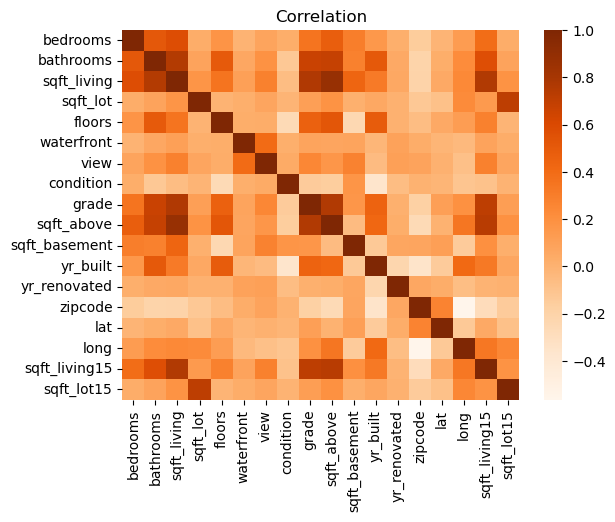

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

hmap = sns.heatmap(features.corr(), cmap='Oranges')
hmap.set_title('Correlation')
plt.show()

- VIF가 inf로 나왔으며, 서로 상관관계가 높은 sqft_living과 sqft_above 중 종속변수와의 상관관계가 더 낮은 sqft_above를 제거합니다.

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pre_h_df3 = pre_h_df3.drop(labels=['sqft_above'], axis=1)

features, targets = pre_h_df3.iloc[:, 1:], pre_h_df3.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0605, RMSE: 0.2459, R2: 0.7771


In [143]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0458, RMSE: 0.2140, R2: 0.8312


- R2가 0.0001 상승하였으나, 너무 근소한 차이이므로 종속변수와의 상관관계가 0.3 미만인 feature를 제거하기로 합니다.

In [153]:
columns = ['waterfront', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'long', 'condition', 'zipcode']

pre_h_df4 = pre_h_df3.drop(labels=columns, axis=1)
features, targets = pre_h_df4.iloc[:, 1:], pre_h_df4.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0705, RMSE: 0.2655, R2: 0.7400


In [157]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0607, RMSE: 0.2463, R2: 0.7763


In [158]:
from statsmodels.api import OLS

features, targets = pre_h_df4.iloc[:, 1:], pre_h_df4.iloc[:, 0]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.962e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:44:44   Log-Likelihood:                         -6131.3
No. Observations:               21613   AIC:                                  1.228e+04
Df Residuals:                   21604   BIC:                                  1.235e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [159]:
get_vif(features)

,vif_score,feature
0,22.817935,bedrooms
1,24.969440,bathrooms
2,34.701935,sqft_living
3,15.834383,floors
4,1.278659,view
5,137.003241,grade
6,2.598598,sqft_basement
7,82.364662,lat
8,26.128365,sqft_living15


In [160]:
features.corr()

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_basement,lat,sqft_living15
bedrooms,1.000000,0.515932,0.576693,0.175466,0.079543,0.356978,0.303112,-0.008913,0.391666
bathrooms,0.515932,1.000000,0.754665,0.500653,0.187737,0.664983,0.283770,0.024573,0.568634
sqft_living,0.576693,0.754665,1.000000,0.353949,0.284611,0.762704,0.435043,0.052529,0.756420
floors,0.175466,0.500653,0.353949,1.000000,0.029444,0.458183,-0.245705,0.049614,0.279885
view,0.079543,0.187737,0.284611,0.029444,1.000000,0.251321,0.276947,0.006157,0.280439
grade,0.356978,0.664983,0.762704,0.458183,0.251321,1.000000,0.168392,0.114084,0.713202
sqft_basement,0.303112,0.283770,0.435043,-0.245705,0.276947,0.168392,1.000000,0.110538,0.200355
lat,-0.008913,0.024573,0.052529,0.049614,0.006157,0.114084,0.110538,1.000000,0.048858
sqft_living15,0.391666,0.568634,0.756420,0.279885,0.280439,0.713202,0.200355,0.048858,1.000000


In [161]:
pre_h_df4.corr()['price'].sort_values(ascending=False)[1:]

grade            0.703636
sqft_living      0.695341
sqft_living15    0.619312
bathrooms        0.550799
lat              0.449175
view             0.346523
bedrooms         0.343611
sqft_basement    0.316969
floors           0.310556
Name: price, dtype: float64

- 다시 트리 모델로 회귀 예측을 수행합니다.

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_h_df4.iloc[:, 1:], pre_h_df4.iloc[:, 0]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0862, RMSE: 0.2937, R2: 0.6821
RandomForestRegressor
MSE: 0.0433, RMSE: 0.2080, R2: 0.8405
GradientBoostingRegressor
MSE: 0.0424, RMSE: 0.2059, R2: 0.8437
XGBRegressor
MSE: 0.0436, RMSE: 0.2088, R2: 0.8393
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 9
[LightGBM] [Info] Start training from score 13.048521
LGBMRegressor
MSE: 0.0401, RMSE: 0.2003, R2: 0.8521


### 🎈LightGBM 회귀 모델로 훈련 및 예측을 수행했을 때 R2가 약 0.8521로 가장 높게 나타났습니다.